In [2]:
#importing the required libraries
import numpy as np # Numpy for numerical operations
import pandas as pd  # Pandas for data manipulation
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt # Matplotlib for plotting
%matplotlib inline




In [3]:
telco_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') # laoding the csv file into telco_df dataframe

In [4]:
telco_df.head() # displaying the first five records of the dataframe

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [5]:
telco_df.shape # shape() return the number of rows and columns of the dataframe

(7043, 21)

In [6]:
telco_df.columns # this command displays the list of all columns in the dataframe

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# dtypes used to display the datatypes of the columns
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# describe() gives statistical information of the numerical columns
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


insights:

Since SeniorCitizen is a categorical variable, the 25%-50%-75% distribution does not apply accurately to it. 

A significant portion, approximately 75%, of customers have a tenure of fewer than 55 months, indicating a majority of relatively new subscribers.

On average, customers pay USD 64.76 per month, yet around 25% of them pay more than USD 89.85 monthly, implying a considerable range in monthly charges among subscribers.

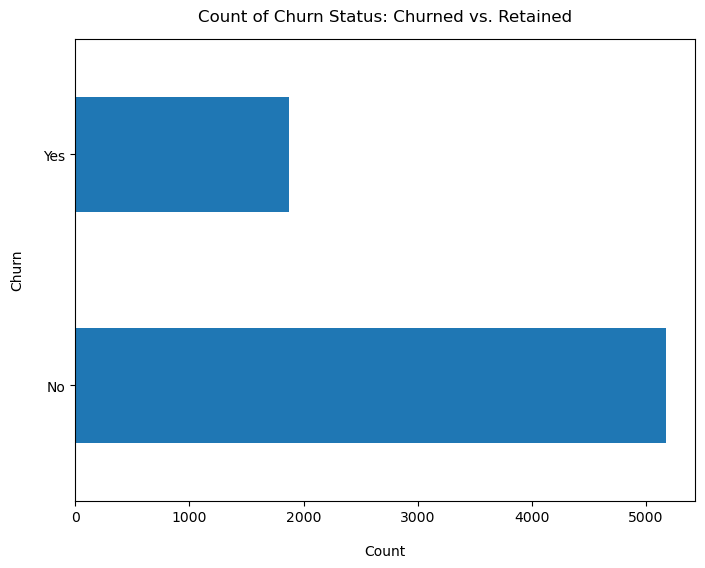

In [9]:
telco_df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Churn", labelpad=14)
plt.title("Count of Churn Status: Churned vs. Retained", y=1.02);


In [10]:
churn_proportion = 100 * telco_df['Churn'].value_counts() / len(telco_df['Churn'])
churn_proportion

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [11]:
telco_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [12]:
tcf = telco_df.drop(['customerID', 'Churn'], axis=1)
tcf.to_csv('tcf.csv')

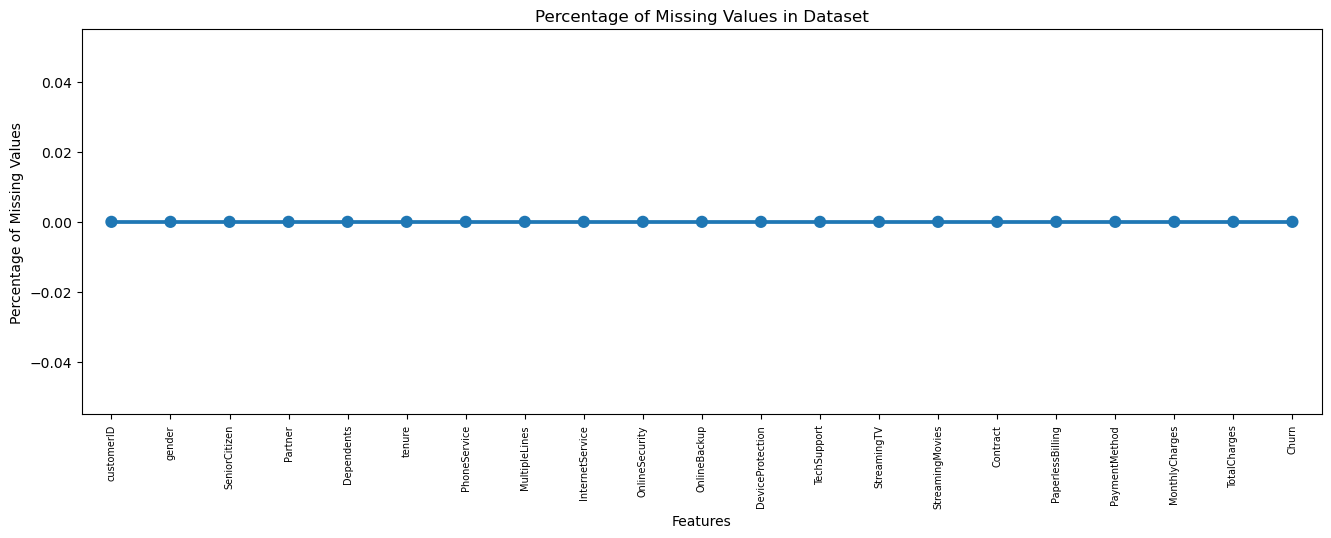

In [11]:
missing = pd.DataFrame((telco_df.isnull().sum()) * 100 / telco_df.shape[0]).reset_index()

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values in Dataset")
plt.ylabel("Percentage of Missing Values")
plt.xlabel("Features")
plt.show()


## Data Cleaning


In [12]:
tc = telco_df.copy() # i am copying the dataframe using the copy() and performing the data warangling tasks ans without effecting the ot=riginal adtaframe

In [13]:
# Total charges should be numeric so i am going to convert it into object to float datatype

In [14]:
tc['TotalCharges'] = pd.to_numeric(tc['TotalCharges'], errors='coerce') # this method converts object datatyoe into float and replacing empty strings into a NaN values
tc.isnull().sum() # the isnull().sum() displays the count of missing values in each column

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
# Here we can see that there are 11 missing values are present in the Total Charges column. And we gonna look into it

In [16]:
tc.loc[tc['TotalCharges'].isnull()]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [17]:
# The percentage of missing values are very low compared to total size of teh dataset. so we can remove the rows having null values. If we impute the missing values we can able to geenerate noise which might be effect the model performance.

In [18]:
#Removing missing values 
tc.dropna(inplace=True)


In [19]:
tc.isnull().sum() # again rechecking whether we are successfully delelted the missing values are not

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
print(tc['tenure'].max()) 

72


In [21]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

tc['tenure_category'] = pd.cut(tc['tenure'], bins=range(1, 80, 12), right=False, labels=labels)


In [22]:
tc['tenure_category'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_category, dtype: int64

In [23]:
# I am going to delete the columns which are not needed whcih doesn't have any effect on target variable(churn)

In [24]:
# dropping the columns which are CustomerID and tenure using drop()method
tc.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
tc.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_category
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration


### Univariate Analysis

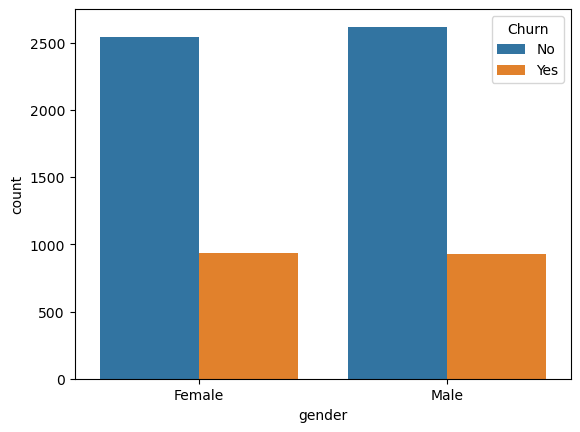

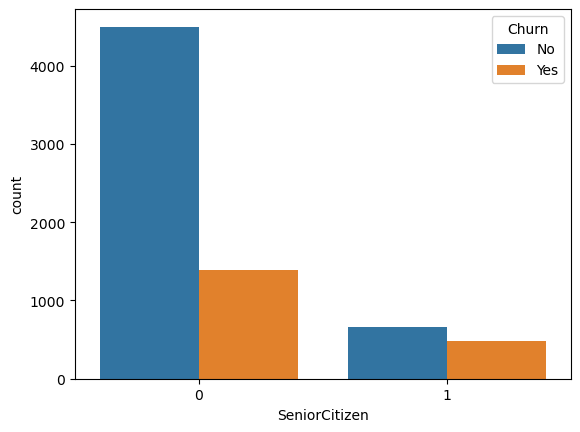

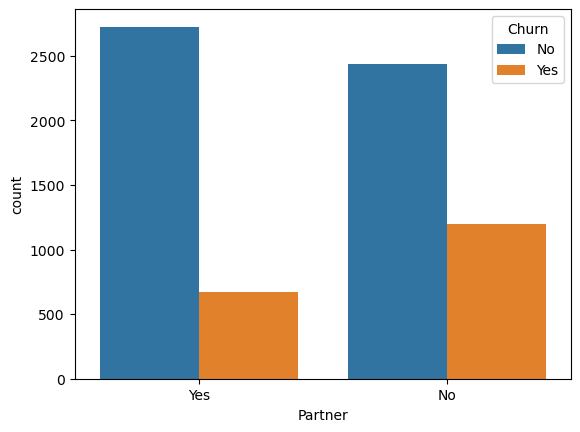

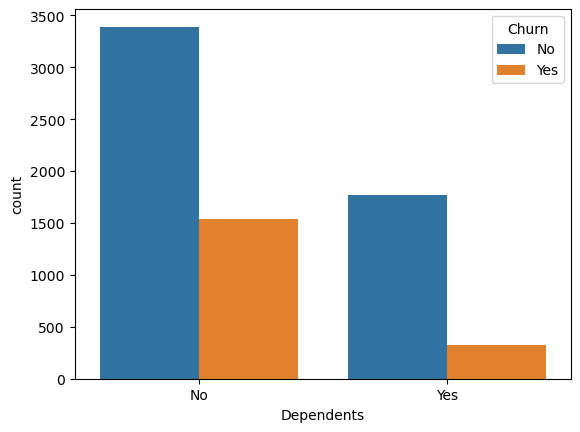

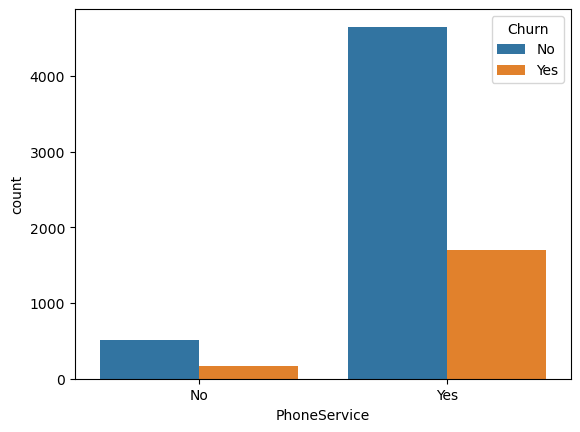

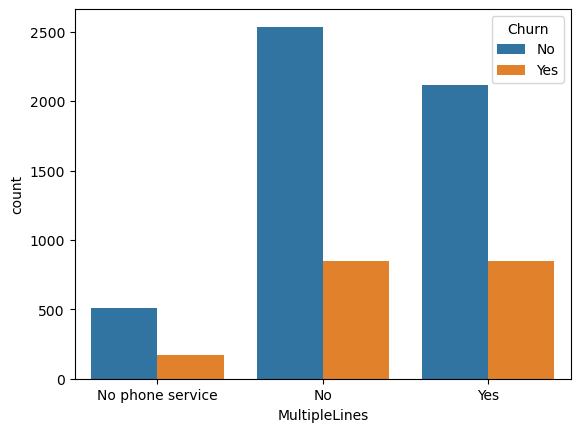

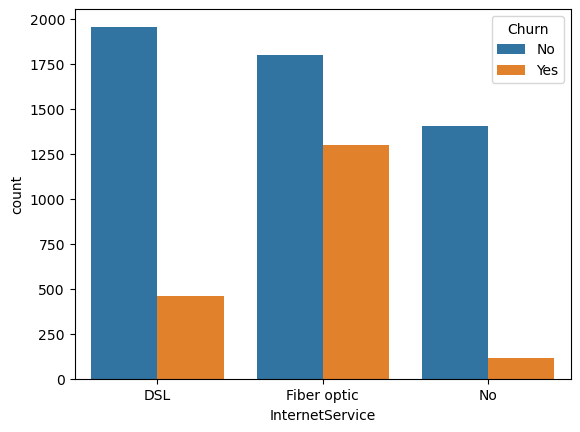

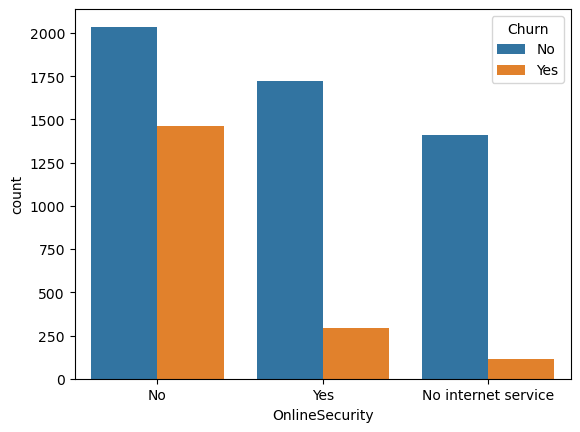

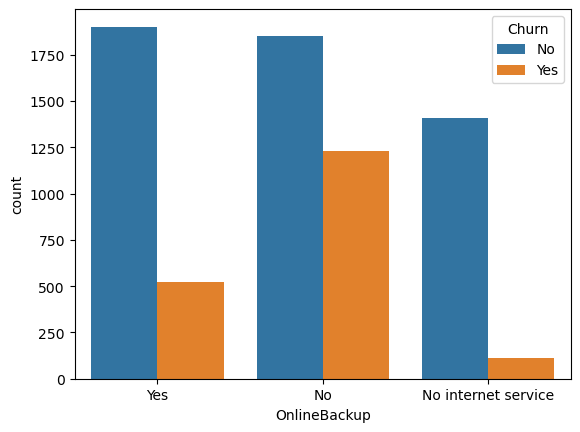

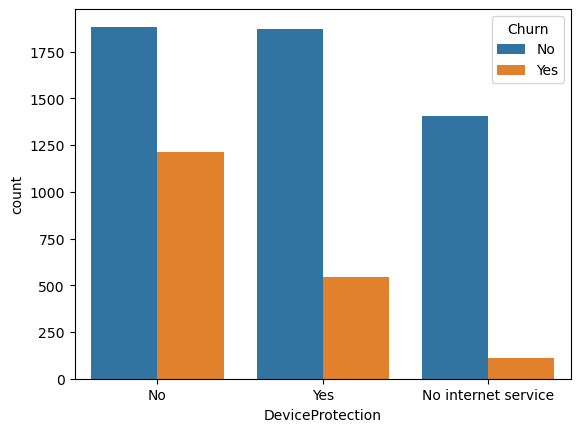

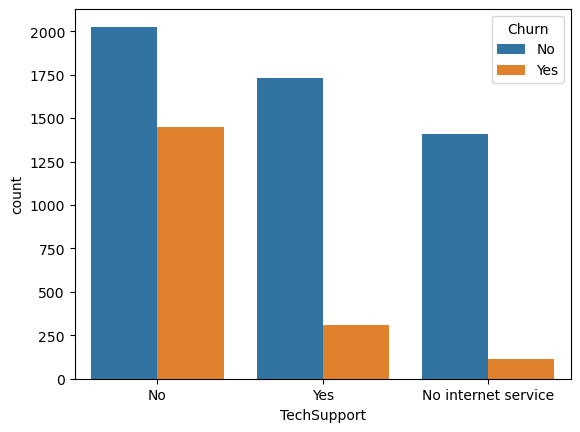

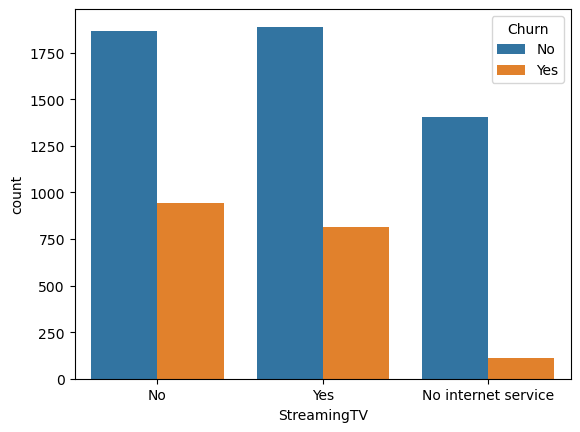

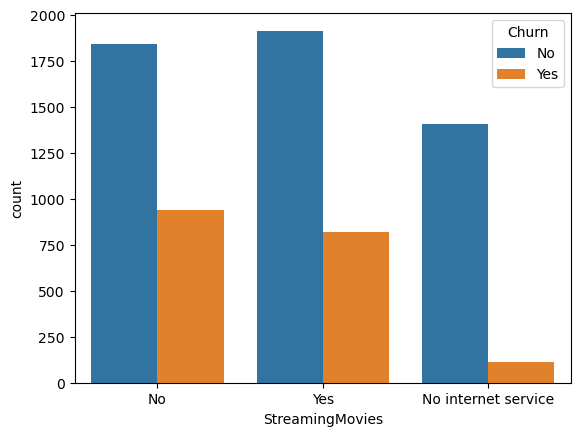

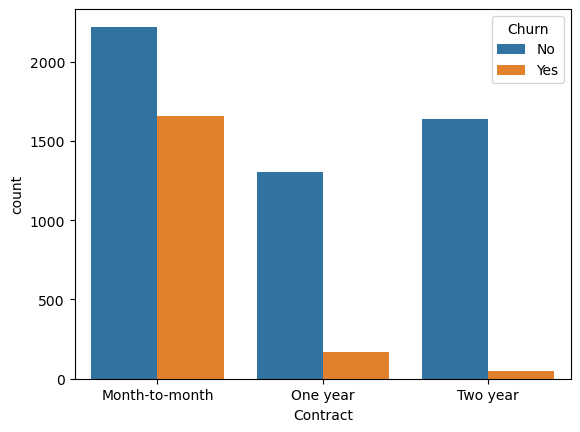

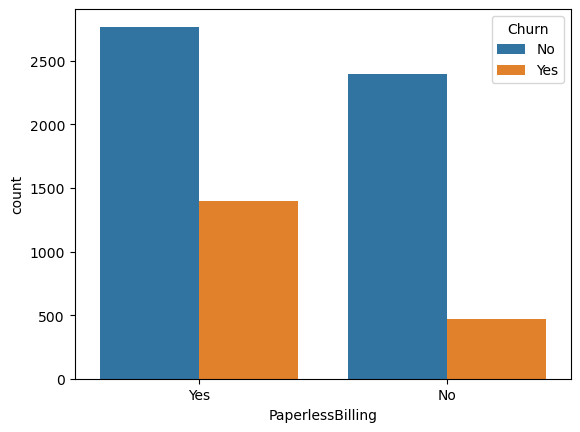

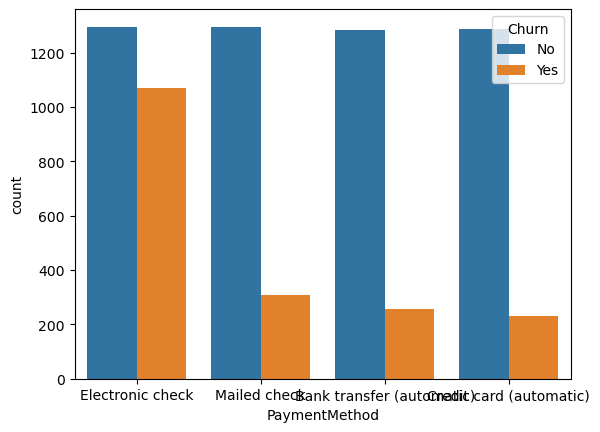

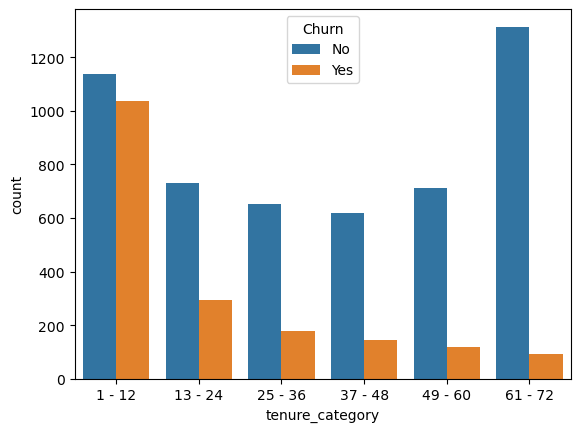

In [25]:
features = tc.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']).columns

for index, feature in enumerate(features):
    fig, ax = plt.subplots()
    sns.countplot(data=tc, x=feature, hue='Churn', ax=ax)
 

In [26]:
# converting the target variables into binary n8mericla values Yes for 1 and No for 0

In [27]:
tc['Churn'] = tc['Churn'].map({'Yes': 1, 'No': 0})


In [28]:
tc.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_category
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [29]:
tc_dummies = pd.get_dummies(tc) # this method is used to convert the all category variables into dummy variables
tc_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_category_1 - 12,tenure_category_13 - 24,tenure_category_25 - 36,tenure_category_37 - 48,tenure_category_49 - 60,tenure_category_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


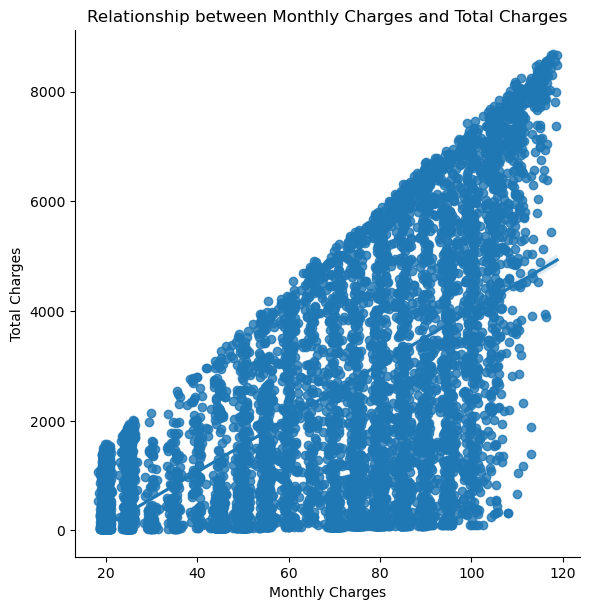

In [30]:
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=tc_dummies, height=6)
plt.title('Relationship between Monthly Charges and Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


Total charges increases with monthly charges both these two features are directly proportional to each other

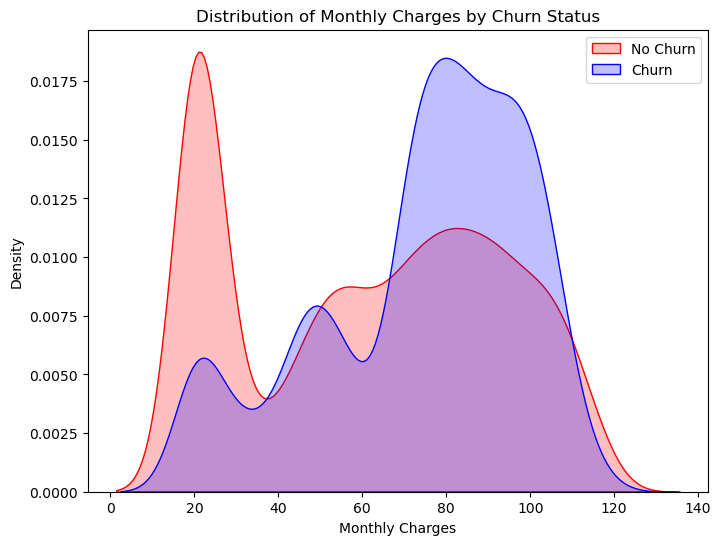

In [31]:
no_churn_monthly_charges = tc_dummies.MonthlyCharges[tc_dummies["Churn"] == 0]
churn_monthly_charges = tc_dummies.MonthlyCharges[tc_dummies["Churn"] == 1]

plt.figure(figsize=(8, 6))
sns.kdeplot(data=no_churn_monthly_charges, color="red", shade=True, label="No Churn")
sns.kdeplot(data=churn_monthly_charges, color="blue", shade=True, label="Churn")

plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('Distribution of Monthly Charges by Churn Status')
plt.legend(loc='upper right')

plt.show()



Insight: monthly charges is high then churn is also high

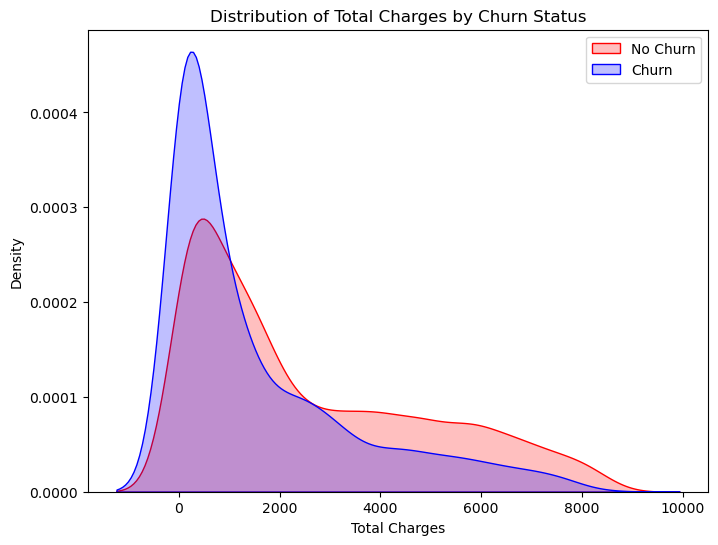

In [32]:
no_churn_total_charges = tc_dummies.TotalCharges[tc_dummies["Churn"] == 0]
churn_total_charges = tc_dummies.TotalCharges[tc_dummies["Churn"] == 1]

plt.figure(figsize=(8, 6))
sns.kdeplot(data=no_churn_total_charges, color="red", shade=True, label="No Churn")
sns.kdeplot(data=churn_total_charges, color="blue", shade=True, label="Churn")

plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.title('Distribution of Total Charges by Churn Status')
plt.legend(loc='upper right')

plt.show()


Insight: Churn is high when  there is less Total charges

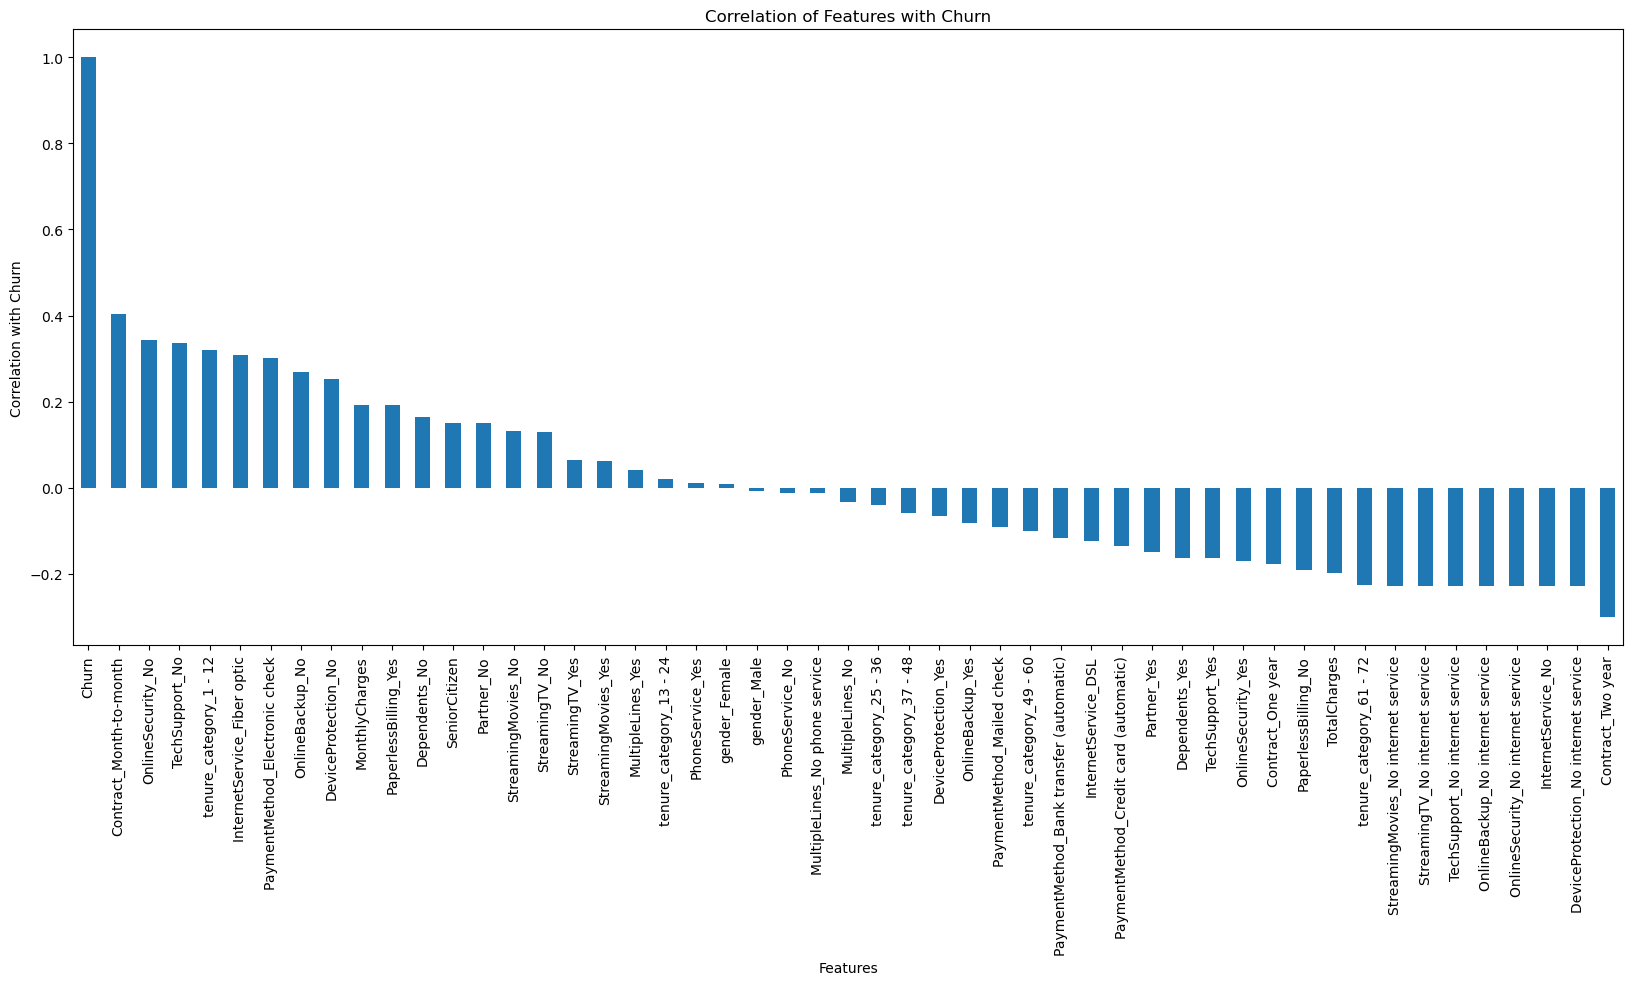

In [33]:
plt.figure(figsize=(20, 8))
tc_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.title('Correlation of Features with Churn')
plt.show()


Insight:

There is a notable increase in churn rates observed among customers with month-to-month contracts, lacking online security and tech support, in their first year of subscription, and utilizing fiber optics internet services.

Conversely, churn rates are considerably lower for customers with long-term contracts, subscriptions without internet service, and those who have been engaged for five or more years.

Factors such as gender, availability of phone service, and the number of multiple lines show minimal to negligible impact on churn behavior.

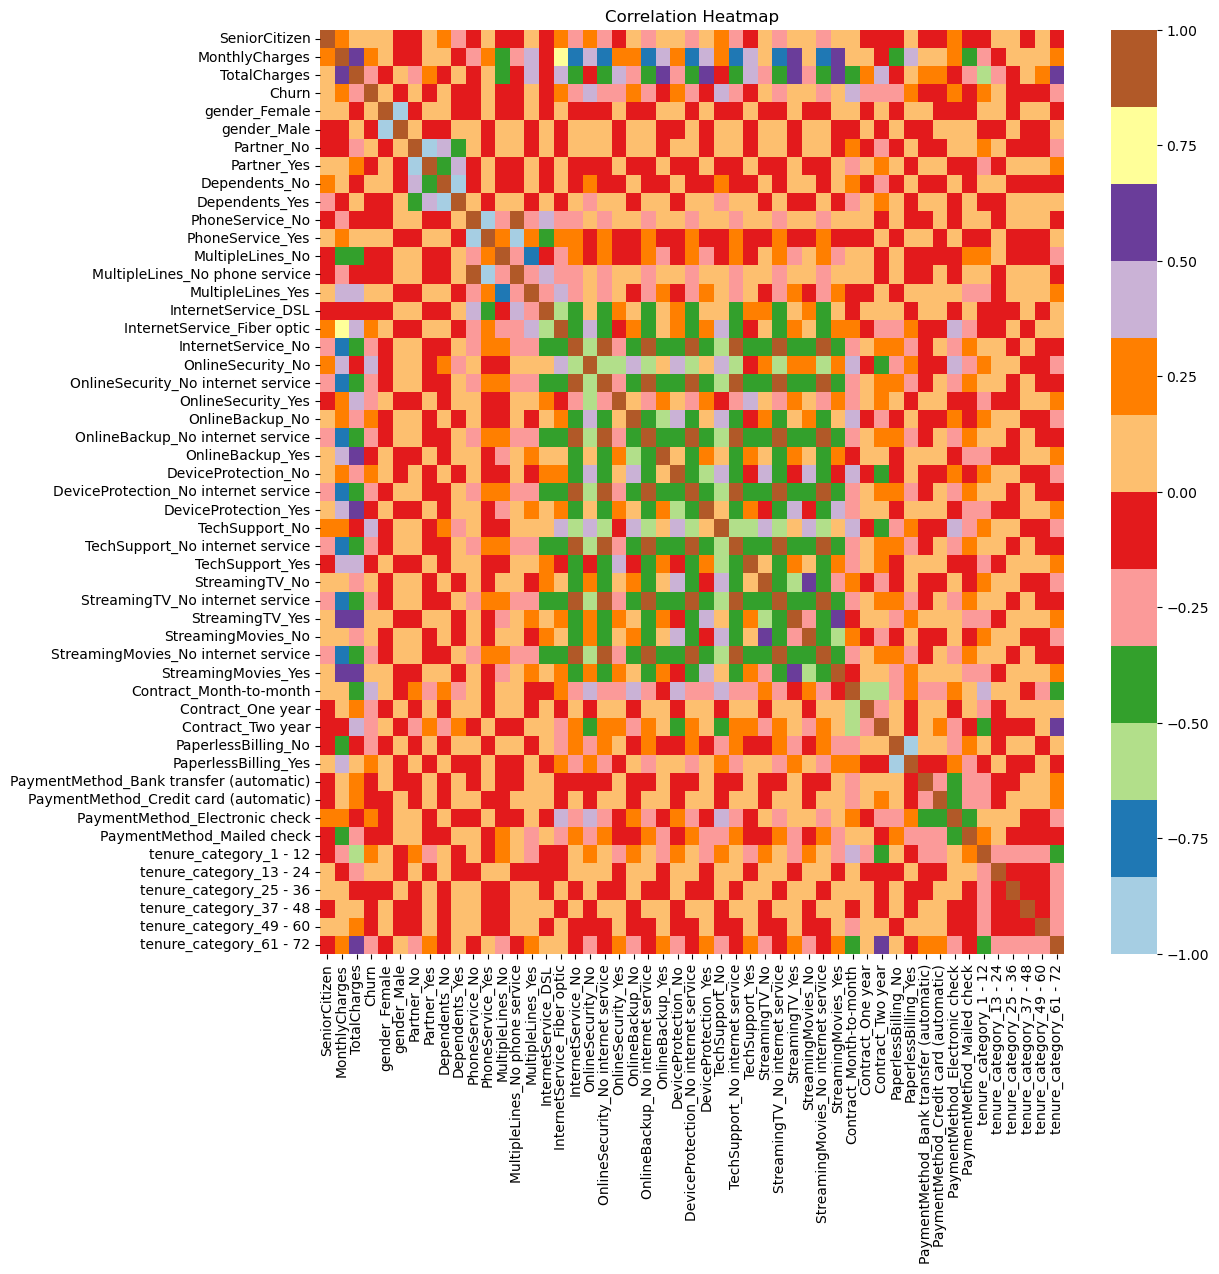

In [34]:
plt.figure(figsize=(12, 12))
sns.heatmap(tc_dummies.corr(), cmap="Paired")
plt.title('Correlation Heatmap')
plt.show()

### Bivariate Analysis

In [35]:
non_churned_customers = tc[tc["Churn"] == 0]
churned_customers = tc[tc["Churn"] == 1]

In [36]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright') 
    plt.show()



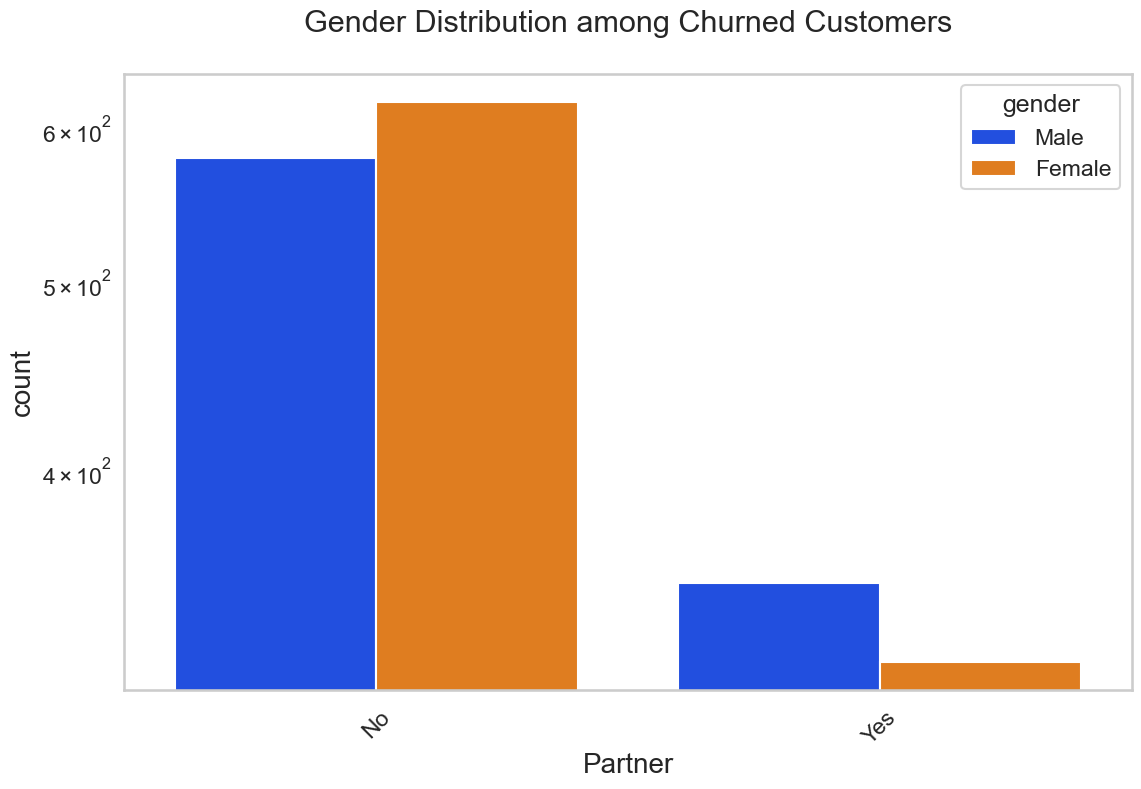

In [37]:
uniplot(churned_customers, col='Partner',title='Gender Distribution among Churned Customers', hue='gender')

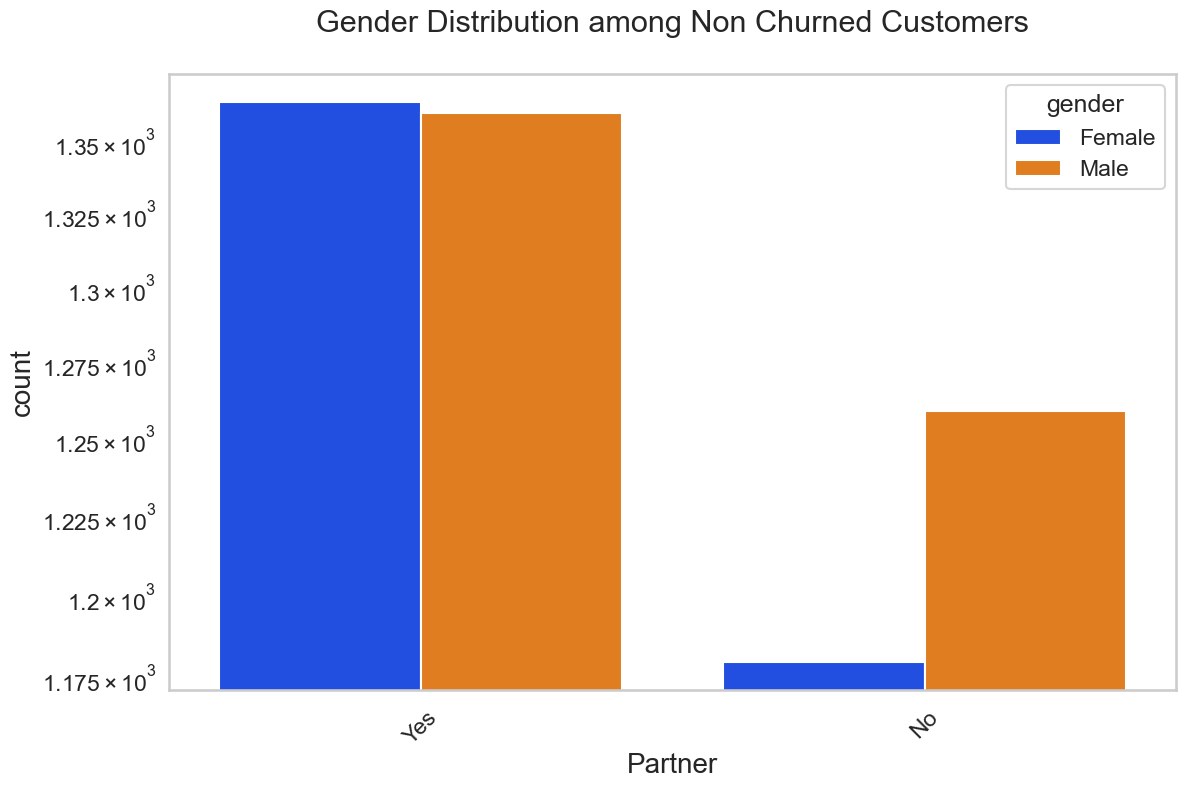

In [38]:


uniplot(non_churned_customers, col='Partner',title='Gender Distribution among Non Churned Customers', hue='gender')


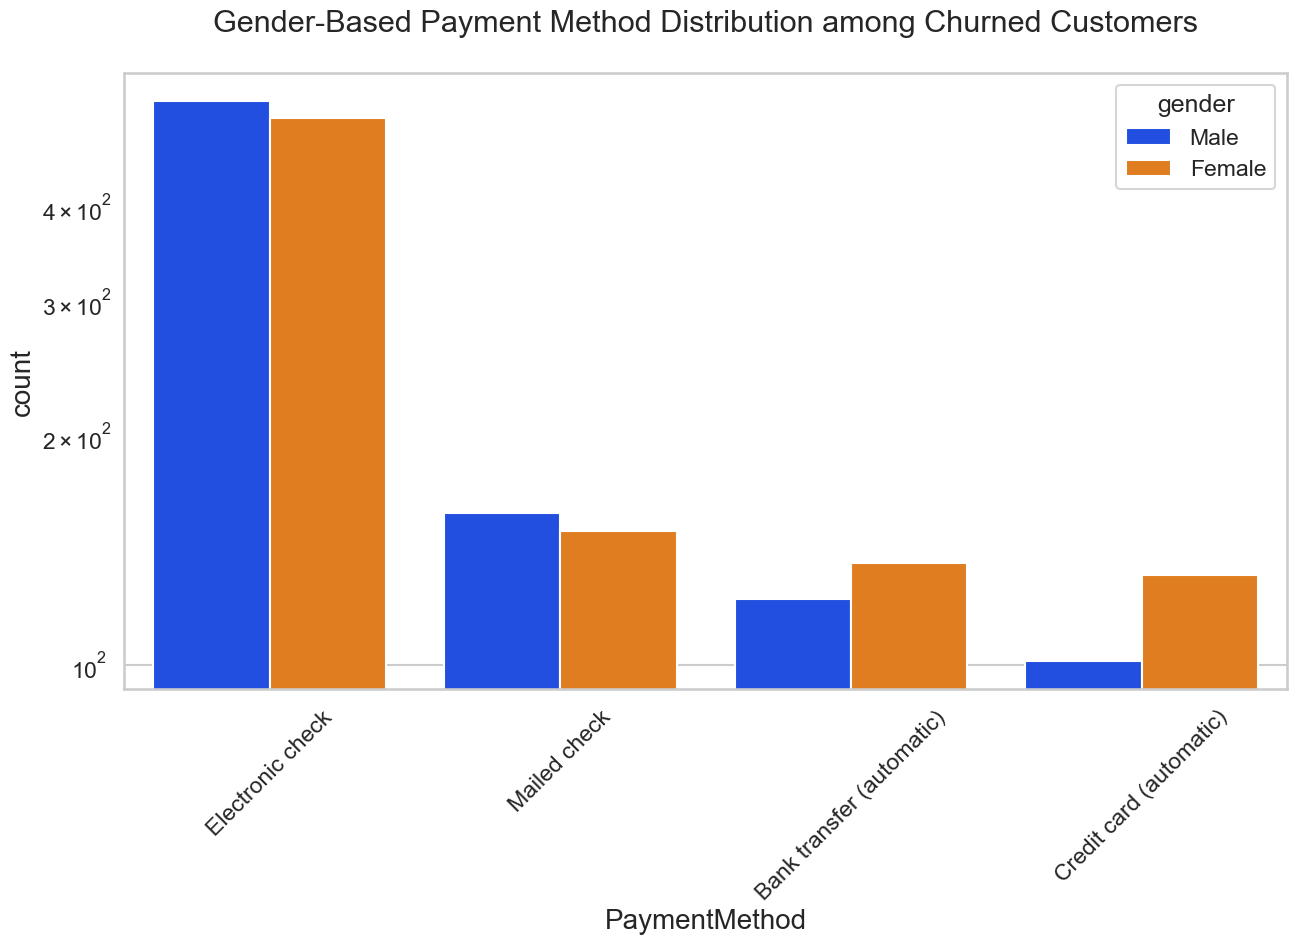

In [39]:
uniplot(churned_customers, col='PaymentMethod',title='Gender-Based Payment Method Distribution among Churned Customers', hue='gender')

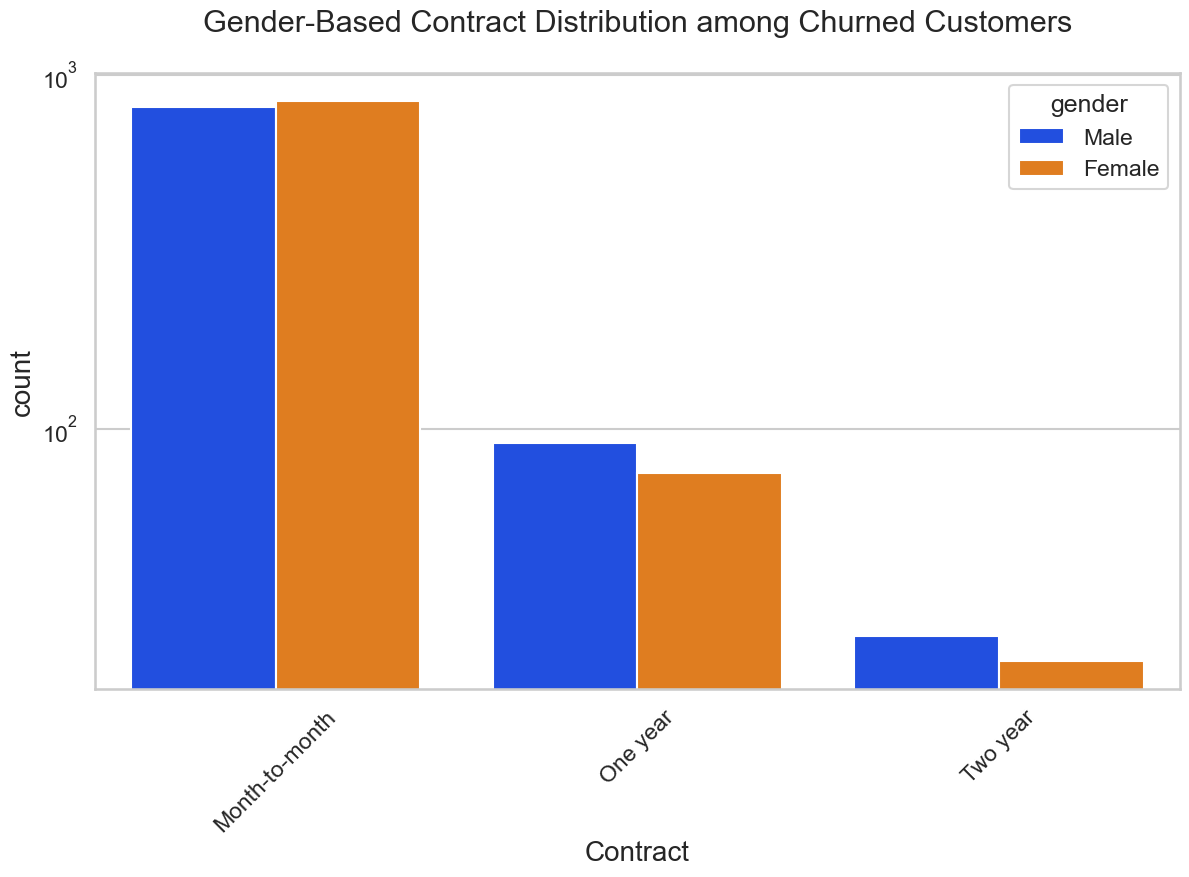

In [40]:
uniplot(churned_customers, col='Contract', title='Gender-Based Contract Distribution among Churned Customers', hue='gender')

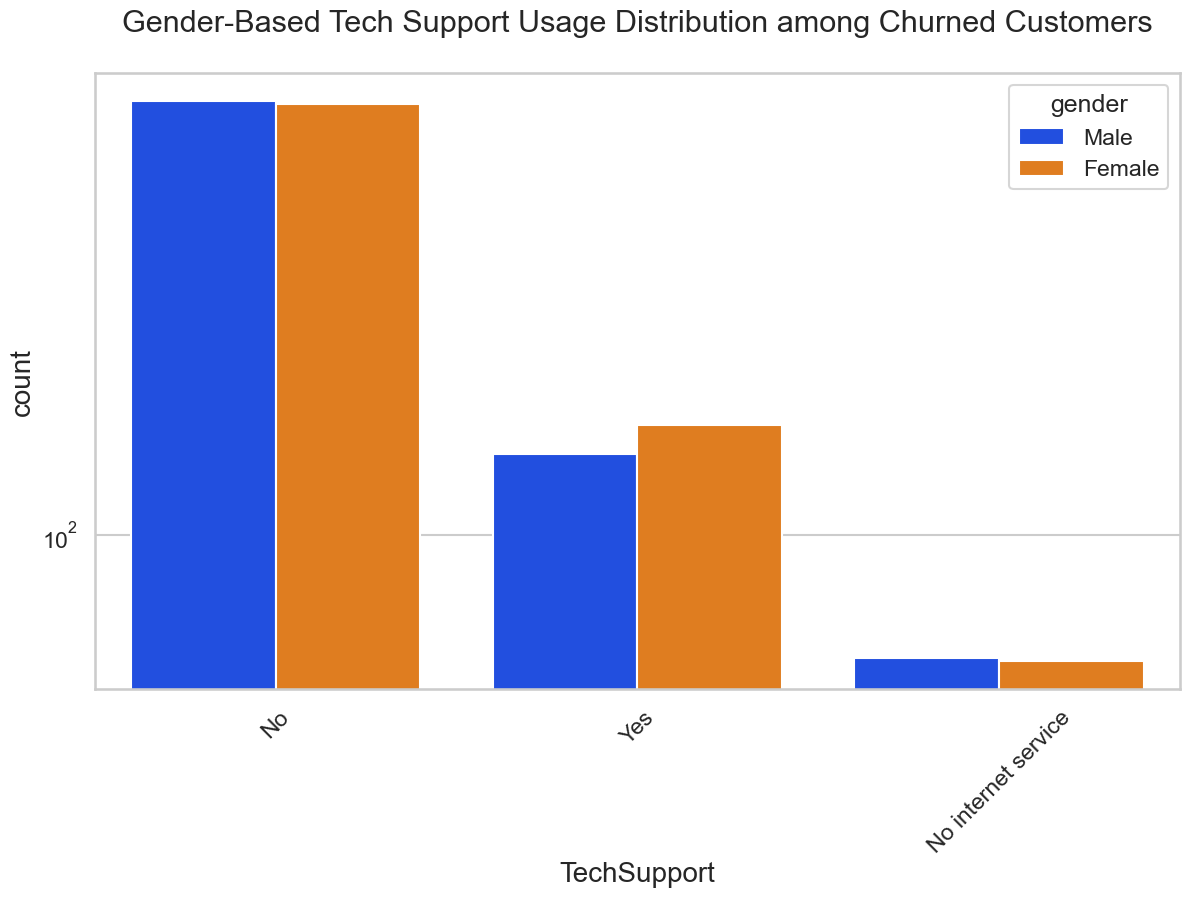

In [41]:
uniplot(churned_customers, col='TechSupport', title='Gender-Based Tech Support Usage Distribution among Churned Customers', hue='gender')

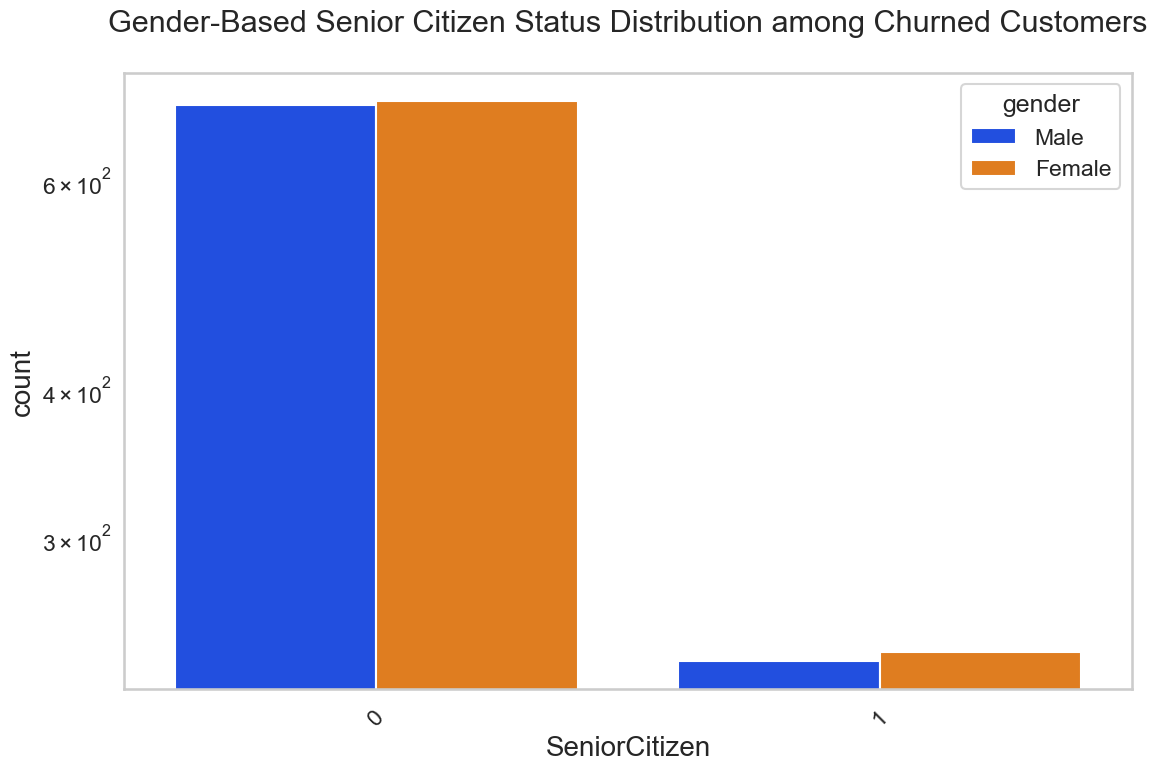

In [42]:
uniplot(churned_customers, col='SeniorCitizen', title='Gender-Based Senior Citizen Status Distribution among Churned Customers', hue='gender')

Insights:

Customers using electronic check as their payment medium exhibit the highest churn rates.

Monthly contract subscribers are more prone to churn due to the absence of contractual obligations, providing them the flexibility to switch providers at any time.

Categories lacking online security and tech support services experience elevated churn rates.

Non-senior citizens are more inclined towards churn compared to senior citizens.

In [43]:
tc_dummies.to_csv('tcc.csv')

In [44]:
!pip install imbalanced-learn

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [45]:
tcc=pd.read_csv("tcc.csv")
tcc.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_category_1 - 12,tenure_category_13 - 24,tenure_category_25 - 36,tenure_category_37 - 48,tenure_category_49 - 60,tenure_category_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [46]:
tcc=tcc.drop('Unnamed: 0',axis=1)

In [47]:
X=tcc.drop('Churn',axis=1)
X

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_category_1 - 12,tenure_category_13 - 24,tenure_category_25 - 36,tenure_category_37 - 48,tenure_category_49 - 60,tenure_category_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [48]:
y=tcc['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Decision Tree Classifier

In [50]:
dtc = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [51]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [52]:
y_predict=dtc.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
dtc.score(X_test,y_test)

0.7960199004975125

In [54]:
print(classification_report(y_test, y_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1041
           1       0.65      0.46      0.54       366

    accuracy                           0.80      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.80      0.78      1407



In [55]:
smote = SMOTEENN()
X_rs, y_rs = smote.fit_resample(X, y)

In [56]:
Xrs_train,Xrs_test,yrs_train,yrs_test=train_test_split(X_rs, y_rs,test_size=0.2)

In [57]:
dtc_smote = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [58]:
dtc_smote.fit(Xrs_train, yrs_train)
yrs_predict = dtc_smote.predict(Xrs_test)

In [59]:
dtc_smote.score(Xrs_test, yrs_test)

0.92399658411614

In [60]:
print(metrics.classification_report(yrs_test, yrs_predict))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       527
           1       0.93      0.93      0.93       644

    accuracy                           0.92      1171
   macro avg       0.92      0.92      0.92      1171
weighted avg       0.92      0.92      0.92      1171



In [61]:
print(metrics.confusion_matrix(yrs_test, yrs_predict))

[[480  47]
 [ 42 602]]


### Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [64]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [65]:
y_predict=rfc.predict(X_test)

In [66]:
rfc.score(X_test,y_test)

0.7896233120113717

In [67]:
print(classification_report(y_test, y_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1041
           1       0.64      0.45      0.52       366

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.78      0.79      0.78      1407



In [68]:
smote = SMOTEENN()
X_rs1, y_rs1 = smote.fit_resample(X,y)

In [69]:
Xrs_train1, Xrs_test1, yrs_train1, yrs_test1 = train_test_split(X_rs1, y_rs1, test_size=0.2)

In [70]:
rfc_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [71]:
rfc_smote.fit(Xrs_train1,yrs_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [72]:
yrs_predict1 = rfc_smote.predict(Xrs_test1)

In [73]:
rfc_smote.score(Xrs_test1, yrs_test1)

0.9425878320479862

In [74]:
print(metrics.classification_report(yrs_test1, yrs_predict1))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       524
           1       0.92      0.98      0.95       643

    accuracy                           0.94      1167
   macro avg       0.95      0.94      0.94      1167
weighted avg       0.94      0.94      0.94      1167



In [75]:
print(metrics.confusion_matrix(yrs_test1, yrs_predict1))

[[473  51]
 [ 16 627]]


### GradientBoostingClassifier

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
# Create the Gradient Boosting Classifier model
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=100)

In [78]:
# Train the model
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=100)

In [79]:
# Make predictions
y_predict = gbc.predict(X_test)

In [80]:
# Evaluate model performance
gbc.score(X_test, y_test)

0.7938877043354655

In [81]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_predict, labels=[0, 1]))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1041
           1       0.62      0.53      0.57       366

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407



In [82]:
smote = SMOTEENN()
X_rs2, y_rs2 = smote.fit_resample(X, y)

In [83]:
Xrs_train2, Xrs_test2, yrs_train2, yrs_test2 = train_test_split(X_rs2, y_rs2, test_size=0.2)

In [84]:
# Train the model on resampled data
gbc_smote = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=100)

In [85]:
gbc_smote.fit(Xrs_train2, yrs_train2)

GradientBoostingClassifier(random_state=100)

In [86]:
yrs_predict2 = gbc_smote.predict(Xrs_test2)

In [87]:
gbc_smote.score(Xrs_test2, yrs_test2)

0.955593509820666

In [88]:
print("Classification Report with SMOTEENN:")
print(classification_report(yrs_test2, yrs_predict2, labels=[0, 1]))

Classification Report with SMOTEENN:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       543
           1       0.95      0.96      0.96       628

    accuracy                           0.96      1171
   macro avg       0.96      0.95      0.96      1171
weighted avg       0.96      0.96      0.96      1171



In [89]:
print("Confusion Matrix:")
print(metrics.confusion_matrix(yrs_test2, yrs_predict2))

Confusion Matrix:
[[514  29]
 [ 23 605]]


In [90]:
import pickle

In [91]:
file_gbc = 'gbc.sav'

In [92]:
pickle.dump(gbc_smote, open(file_gbc, 'wb'))

In [93]:
load_gbc = pickle.load(open(file_gbc, 'rb'))

In [94]:
gbc_smote_loaded_score = load_gbc.score(Xrs_test2, yrs_test2)

In [95]:
gbc_smote_loaded_score


0.955593509820666